# Final Exercice: The Rumos Bank 

The Rumos Bank é um banco que tem perdido bastante dinheiro devido à quantidade de créditos que fornece e que não são pagos dentro do prazo devido. 

    - Por cada cliente que se estima que não irá  pagar dentro do prazo e afinal paga, o banco tem um custo de 1000euros. 

    - Por cada cliente que se prevê como sendo um bom pagador e afinal não paga dentro do prazo, o banco tem um custo de 3000euros.


Vocês, data scientists de topo,  são contratados para ajudar o banco a prever quais os clientes que não irão cumprir os prazos, para que este consiga uma melhor gestão dos fundos.

Conseguem construir um modelo que ajude a detectar previamente e com sucesso os clientes que são maus pagadores?


Dataset: https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

Variáveis disponíveis:

    ID: ID of each client
    LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
    SEX: Gender (1=male, 2=female)
    EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
    MARRIAGE: Marital status (1=married, 2=single, 3=others)
    AGE: Age in years
    PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
    PAY_2: Repayment status in August, 2005 (scale same as above)
    PAY_3: Repayment status in July, 2005 (scale same as above)
    PAY_4: Repayment status in June, 2005 (scale same as above)
    PAY_5: Repayment status in May, 2005 (scale same as above)
    PAY_6: Repayment status in April, 2005 (scale same as above)
    BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
    BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
    BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
    BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
    BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
    BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
    PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
    PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
    PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
    PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
    PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
    PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
    default.payment.next.month: Default payment (1=yes, 0=no)

Com base na informação dada, podemos definir que:

    True positive - Os maus pagadores são identificados correctamente.
    True negative - Os bons pagadores são identificados correctamente.
    False positive - Um bom pagador é identificado como sendo um mau pagador.
    False negative - Um mau pagador é identificado como sendo um bom pagador.

#### Perguntas:

    1. Quantas features estão disponíveis? Quantos clientes?
    2. Quantos clientes têm no dataset que efectivamente foram maus pagadores? E quantos não foram?
    3. Qual o modelo que levou a melhores resultados? Qual a métrica usada para comparar os diferentes modelos?
    4. Quais são as features mais relevantes para decidir se um cliente tem mais propensão para ser mau pagador?
    5. Qual seria o custo que o banco tem sem nenhum modelo?
    6. Qual o custo que o banco passa a tar com o vosso modelo?

In [3]:
root_path = '../data/'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import  precision_recall_curve, roc_auc_score, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score,auc, roc_curve
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

seed = 42

In [5]:
df = pd.read_csv(root_path + 'lending_data.csv')

In [6]:
df.shape

(30000, 25)

In [7]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [8]:
df.ID.nunique()

30000

#### 1. Quantas features estão disponíveis? Quantos clientes?

    - Existem 24 features disponíveis no dataset.
    - Existem 30000 clientes.

Existem missing values?

In [9]:
df.isnull().values.any()

np.False_

Existem o mesmo número de clientes nas duas classes?

In [10]:
df.groupby('default.payment.next.month')['default.payment.next.month'].count()

default.payment.next.month
0    23364
1     6636
Name: default.payment.next.month, dtype: int64

Não! O dataset é altamente desequilibrado.

#### 2. Quantos clientes têm no dataset que efectivamente foram maus pagadores? E quantos não foram?

    - 23,364 foram bons pagadores. 6,636 foram maus pagadores.

Existem features não númericas?

In [11]:
df.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

Todas as features são númericas.

Vamos retirar o ID do cliente:

In [12]:
df = df.drop('ID', axis = 1)

Vamos então dividir o dataset em treino e teste:

In [13]:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = seed)

In [14]:
X_train = train_set.drop(['default.payment.next.month'], axis = 'columns')
y_train = train_set['default.payment.next.month']

X_test = test_set.drop(['default.payment.next.month'], axis = 1)
y_test = test_set['default.payment.next.month']

Normalização:

In [15]:
scaler = MinMaxScaler()

features_names = X_train.columns

X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = features_names)

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns = features_names)

Antes de iniciar, vamos calcular a baseline, ou seja, o custo que temos sem nenhum modelo.

$$totalCost = 1000∗FP+3000∗FN$$

In [16]:
y_preds_all_bad = np.ones(y_test.shape) 

In [17]:
tn, fp, fn, tp = confusion_matrix(y_test, y_preds_all_bad).ravel()

print('Number of True Negatives:', tn)
print('Number of True Positives:', tp)
print('Number of False Negatives:', fn)
print('Number of False Positives:', fp)

Number of True Negatives: 0
Number of True Positives: 1313
Number of False Negatives: 0
Number of False Positives: 4687


In [18]:
print('Total Cost:', fp*1000)

Total Cost: 4687000


In [19]:
accuracy_score(y_test, y_preds_all_bad)

0.21883333333333332

Se todos os clientes fossem considerados como maus pagadores, o banco teria um custo de 4,687,000 Euros.

In [20]:
y_preds_all_good = np.zeros(y_test.shape) 

tn, fp, fn, tp = confusion_matrix(y_test, y_preds_all_good).ravel()

print('Number of True Negatives:', tn)
print('Number of True Positives:', tp)
print('Number of False Negatives:', fn)
print('Number of False Positives:', fp)

Number of True Negatives: 4687
Number of True Positives: 0
Number of False Negatives: 1313
Number of False Positives: 0


In [21]:
print('Total Cost:', fn*3000)

Total Cost: 3939000


In [22]:
accuracy_score(y_test, y_preds_all_good)

0.7811666666666667

Se todos os clientes fossem considerados bons pagadores, o banco teria um custo de 3,939,000 Euros.

In [23]:
def total_cost(y_test, y_preds, threshold = 0.5):
    
    tn, fp, fn, tp = confusion_matrix(y_test == 1, y_preds > threshold).ravel()
    
    cost_fn = fn*3000
    cost_fp = fp*1000
    
    return cost_fn + cost_fp
    

In [24]:
def min_cost_threshold(y_test, y_preds):
    
    costs = {}
    
    for threshold in np.arange(0, 1.1, 0.1):
        
        costs[round(threshold, 1)] = total_cost(y_test, y_preds, threshold = threshold)
        
    plt.plot(list(costs.keys()), list(costs.values()))
    plt.ylabel('Cost')
    plt.xlabel('Threshold')
    plt.show()
    

#### Logistic Regression

In [25]:
%%time
lr = LogisticRegression(max_iter = 500, solver = 'lbfgs', random_state = seed, class_weight = 'balanced' )

parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

clf_lr = GridSearchCV(lr, parameters, cv = 5).fit(X_train, y_train)

CPU times: total: 9.02 s
Wall time: 2.48 s


In [26]:
clf_lr.score(X_test, y_test)

0.6936666666666667

In [27]:
y_preds = clf_lr.predict_proba(X_test)[:,1]

In [28]:
total_cost(y_test, y_preds, threshold = 0.5)

np.int64(2852000)

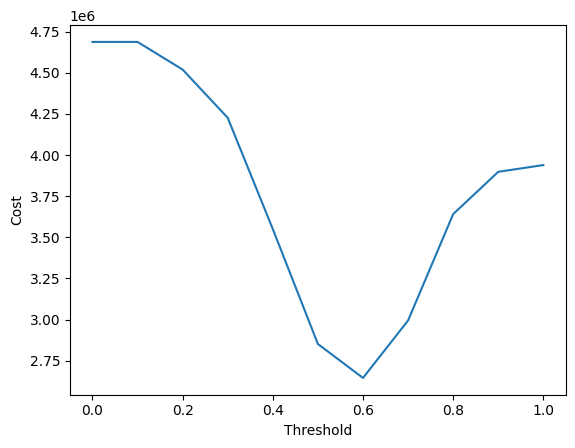

In [29]:
min_cost_threshold(y_test, y_preds)

In [30]:
total_cost(y_test, y_preds, threshold = 0.6)

np.int64(2646000)

O Custo é minimo para um threshold de 0.6: 2,646,000 Euros, que é a melhor que a baseline!

#### KNN

In [31]:
%%time
knn = KNeighborsClassifier()

parameters = {'n_neighbors': range(1,10, 1)}

clf_knn = GridSearchCV(knn, parameters, cv = 5).fit(X_train, y_train)

CPU times: total: 49 s
Wall time: 17 s


KNN não é um metodo adequado para grandes datasets! Vamos ver se compensa a nível de resultados:

In [32]:
y_preds = clf_knn.predict_proba(X_test)[:,1]

clf_knn.score(X_test, y_test)

0.807

In [33]:
total_cost(y_test, y_preds, threshold = 0.5)

np.int64(2900000)

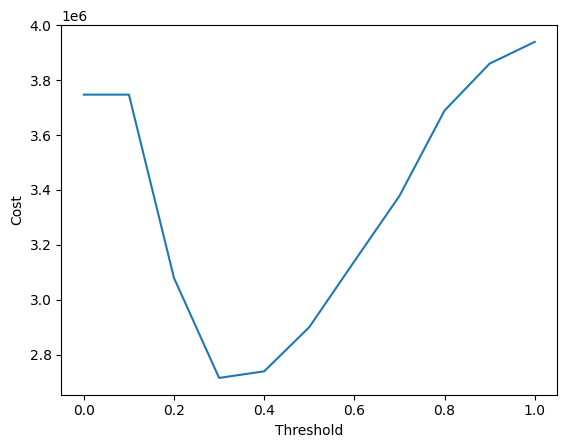

In [34]:
min_cost_threshold(y_test, y_preds)

In [35]:
total_cost(y_test, y_preds, threshold = 0.3)

np.int64(2715000)

Melhor que a baseline mas pior que usar regressão logistica.

#### SVM

In [ ]:
#%%time

#svc = SVC(random_state = seed, class_weight = 'balanced', gamma = 'scale', probability = True, verbose = True)

#parameters = {'C':[0.1, 1, 10], 'kernel': ('rbf', 'linear') }

#clf_svc = GridSearchCV(svc, parameters, cv = 5).fit(X_train, y_train)

[LibSVM].............
*
optimization finished, #iter = 13751
obj = -1079.975659, rho = -1.571294
nSV = 11227, nBSV = 8898
Total nSV = 11227
.............
*
optimization finished, #iter = 13602
obj = -1074.923463, rho = -1.831821
nSV = 11178, nBSV = 8899
Total nSV = 11178
.............
*.
*
optimization finished, #iter = 13753
obj = -1078.734402, rho = -1.491745
nSV = 11219, nBSV = 8954
Total nSV = 11219
.............
*
optimization finished, #iter = 13621
obj = -1077.725906, rho = -1.650705
nSV = 11191, nBSV = 8911
Total nSV = 11191
.............
*.
*
optimization finished, #iter = 13726
obj = -1067.545571, rho = -1.682148
nSV = 11125, nBSV = 8876
Total nSV = 11125
...............
*.
*
optimization finished, #iter = 16065
obj = -1335.579355, rho = 1.717018
nSV = 13857, nBSV = 10643
Total nSV = 13857
[LibSVM].............
**.*
optimization finished, #iter = 13584
obj = -1079.589203, rho = -1.655950
nSV = 11230, nBSV = 8952
Total nSV = 11230
.............
**.*
optimization finished, #ite

In [ ]:
#y_preds = clf_svc.predict_proba(X_test)[:,1]

In [ ]:
#clf_svc.score(X_test, y_test)

0.7778333333333334

In [ ]:
#total_cost(y_test, y_preds, threshold = 0.5)

2933000

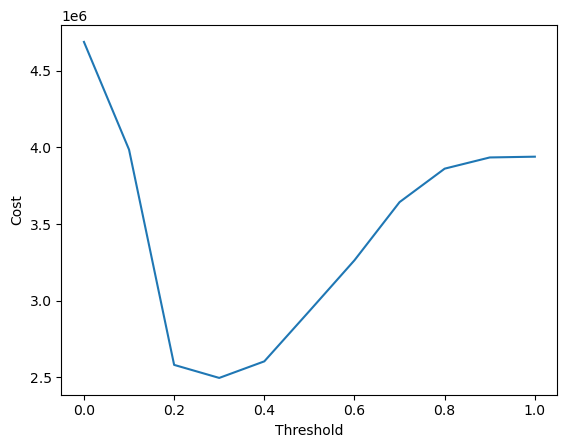

In [ ]:
#min_cost_threshold(y_test, y_preds)

In [ ]:
#total_cost(y_test, y_preds, threshold = 0.3)

2497000

Melhor valor até agora!

#### Decision Trees

In [36]:
%%time

trees = tree.DecisionTreeClassifier(random_state = seed,  class_weight = 'balanced')

parameters = {'max_depth':[3, 6], 'min_samples_split': [2, 4, 10]}

clf_tree = GridSearchCV(trees, parameters, cv = 5).fit(X_train, y_train)

CPU times: total: 4.88 s
Wall time: 4.9 s


In [37]:
clf_tree.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=42)

In [38]:
y_preds = clf_tree.predict_proba(X_test)[:,1]

clf_tree.score(X_test, y_test)

0.7608333333333334

In [39]:
total_cost(y_test, y_preds, threshold = 0.5)

np.int64(2581000)

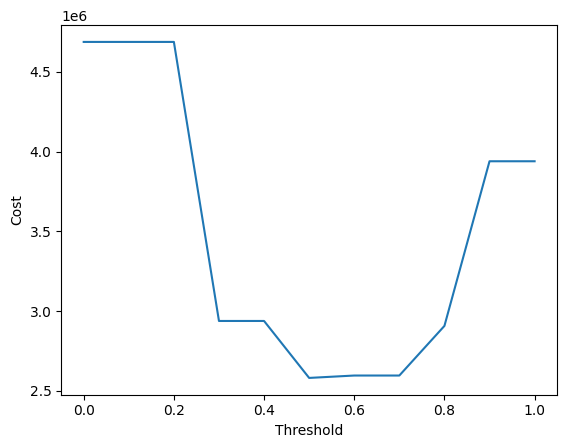

In [40]:
min_cost_threshold(y_test, y_preds)

In [41]:
total_cost(y_test, y_preds, threshold = 0.5)

np.int64(2581000)

SVMs continuam a ganhar.

#### Random Forests

In [42]:
%%time 
rf = RandomForestClassifier(random_state = seed,  class_weight = 'balanced').fit(X_train, y_train)

parameters = {'n_estimators':[10, 100, 300, 1000]}

clf_rf = GridSearchCV(rf, parameters, cv = 5).fit(X_train, y_train)

CPU times: total: 9min 34s
Wall time: 10min 5s


In [43]:
y_preds = clf_rf.predict_proba(X_test)[:,1]

clf_rf.score(X_test, y_test)

0.817

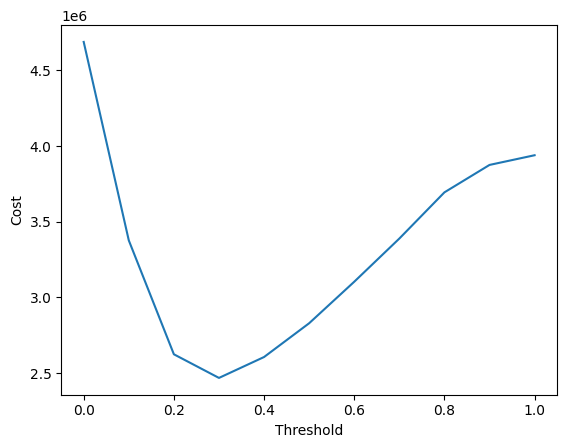

In [44]:
min_cost_threshold(y_test, y_preds)

In [45]:
total_cost(y_test, y_preds, threshold = 0.3)

np.int64(2469000)

Melhor resultado até agora!

#### Neural Networks

In [46]:
X_train.shape

(24000, 23)

In [47]:
%%time

mlp = MLPClassifier(solver = 'lbfgs',  random_state = seed, max_iter = 1000 )

parameters = {'hidden_layer_sizes': [(20,), (20,10), (20, 10, 2)], 'learning_rate_init':[0.0001, 0.001, 0.01, 0.1]}

clf_mlp = GridSearchCV(mlp, parameters, cv = 5).fit(X_train, y_train)

c:\Users\diogo\miniconda3\envs\OML\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\diogo\miniconda3\envs\OML\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\diogo\miniconda3\envs\OML\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (sta

CPU times: total: 1h 7min 17s
Wall time: 20min 7s


c:\Users\diogo\miniconda3\envs\OML\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [48]:
clf_mlp.best_estimator_

MLPClassifier(hidden_layer_sizes=(20, 10, 2), learning_rate_init=0.0001,
              max_iter=1000, random_state=42, solver='lbfgs')

In [49]:
clf_mlp.best_score_

np.float64(0.8181666666666668)

In [50]:
y_preds = clf_mlp.predict_proba(X_test)[:,1]

clf_mlp.score(X_test, y_test)


0.8193333333333334

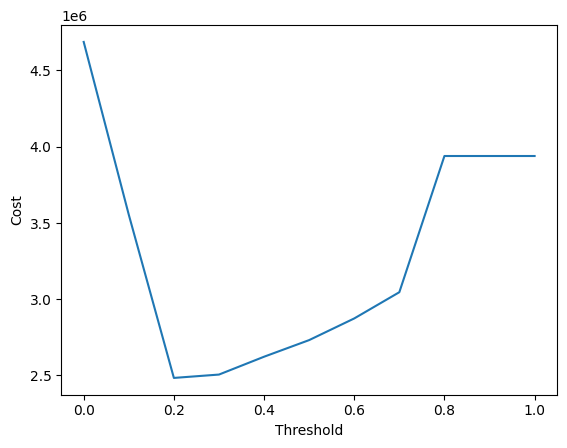

In [51]:
min_cost_threshold(y_test, y_preds)

In [52]:
total_cost(y_test, y_preds, threshold = 0.2)

np.int64(2484000)

Resultado quase igual às random forests!

#### 3. Qual o modelo que levou a melhores resultados? Qual a métrica usada para comparar os diferentes modelos?

- A métrica usada foi o custo total uma vez que o objetivo do modelo era diminuir os custos do banco. O Modelo que levou a melhores resultados foram as neural networks e as random forests - 2,467,000 de custo.  
- Visto que com as neural networks não consigo saber qual a importancia das features, vou eleger o modelo de random forests como a solução final. Para além disso o treino das neural networks demorou quase o dobro do tempo.

#### 4. Quais são as features mais relevantes para decidir se um cliente tem mais propensão para ser mau pagador?

In [53]:
rf = RandomForestClassifier(**clf_rf.best_params_).fit(X_train, y_train)

In [54]:
important_features = pd.DataFrame(data = rf.feature_importances_, index = X_train.columns, columns = ['value'])
important_features.sort_values(by = 'value', ascending = False)

,value
PAY_0,0.098327
AGE,0.066469
BILL_AMT1,0.060048
LIMIT_BAL,0.059440
BILL_AMT2,0.054557
BILL_AMT3,0.051808
PAY_AMT1,0.051212
BILL_AMT6,0.050517
BILL_AMT4,0.050157
BILL_AMT5,0.049812


As variaveis que mais contribuem para o modelo decidir se um cliente vai ser um bom ou mau pagador são:
    - PAY_0 - Repayment status in September, 2005 
    - e AGE - idade do cliente
    

#### 5. Qual seria o custo que o banco tem sem nenhum modelo?

    - O custo que o banco teria sem modelo, ou seja, assumindo que todos os clientes seriam bons pagadores, é de: 3,939,000 Euros.

#### 6. Qual o custo que o banco passa a tar com o vosso modelo?

- O custo que o banco teria com o modelo seria de: 2,476,000 Euros - Pouparia quase 1 Milhão e meio de Euros!